### Agrupamiento/ Clustering
Descriptivos
Agrupa datos similares en grupos 

clasificacion -> predecir una categoria de resultados 
agrupamientos-> agrupar puntos de datos segun semejanzas entre ellos 

técnicas de agrupamiento 
K- means  K- medias 
segrega los datos no etiquetados en varios grupos


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#se aplican los estilos de seaborn 
sns.set()
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('Paises.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Graficar datos 

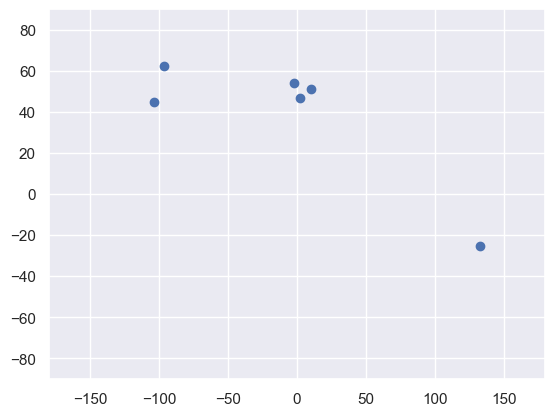

In [3]:
# creamos un grafico que utiliza la longuitud y latitud 
# para poder visualizar un mapa del mundo, utilizamos la longuitud como "y" y la latitud como "x"
plt.scatter(data['Longitude'], data['Latitude'])
#definir los limites de los ejes, para asemejar un mapa en el mundo
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show;

### Seleccionar los datos

In [4]:
# iloc es un metodo para 'cortar' los datos o tomar solo lo necesario 
# el primer agrupamiento identifica las columnas que queremos 
# el segundo las columnas 
#los indices empiezan en cero 
x=data.iloc[:,1:3]
#para este caso elegimos la columna 1 y 2 

In [5]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### Agrupamiento/ clustering 

In [6]:
#creamos el objeto(al que llamamos kmeans)
# el numero de los parentesis es k, o el numero de clusters que deseamos 
kmeans=KMeans(3)

In [7]:
#Ajustamos los datos con el metodo fit (), agrupar los datos en x en k clusters
kmeans.fit(x)

KMeans(n_clusters=3)

### Resultados Agrupamiento/Clustering 

In [31]:
#crear una variable que contenga los clusters predictivos para cada observacion
identifies_clusters=kmeans.fit_predict(x)
#revisar los resultados 
identifies_clusters

array([1, 1, 2, 2, 2, 0])

In [32]:
#creamos copia de los datos 
data_with_clusters=data.copy()
#creamos una nueva serie que contenga los clusters identificados para cada observacion
data_with_clusters['Cluster']=identifies_clusters
#revisar resultados 
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,0


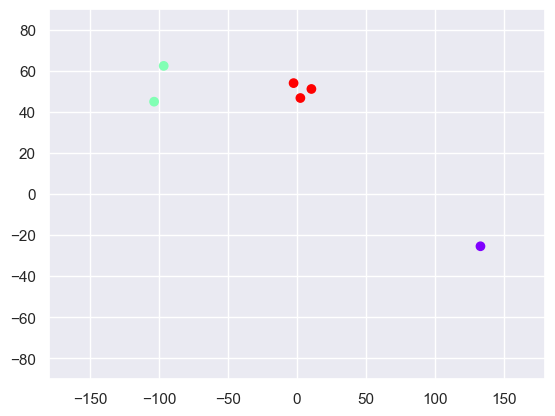

In [33]:
#todos los clusters 0 tendran el mismo color, todos los puntos del cluster 2 tendran el mismo color y asi sucesivamente 
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Mapear datos 

In [34]:
#crear una copia de los datos mapeados o cambiados 
data_mapped =data.copy()
#cambiar los lenguajes con 0, 1 y 2 
data_mapped['Language']=data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Seleccionar los datos 

In [47]:
m = data_mapped.iloc[:,3:4]

In [48]:
m

,Language
0,0
1,0
2,1
3,0
4,2
5,0


### Clustering

In [49]:
kmeans = KMeans(3)

In [50]:
kmeans.fit(m)

KMeans(n_clusters=3)

### Resultados agrupamiento/clustering

In [55]:
identifies_clusters=kmeans.fit_predict(m)
identifies_clusters

array([0, 0, 2, 0, 1, 0])

In [56]:
data_with_clusters = data.copy()
data_with_clusters['Cluster']=identifies_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


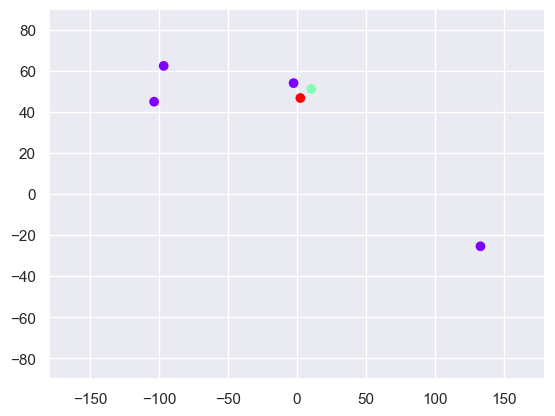

In [57]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show();

Determinar el numero de clusters 
1. minimizar la distancia entre puntos en un agrupamiento 
2. maximizar la distancia entre agrupamientos 

la distancia entre puntos de un agrupamiento se mide mediante la suma de cuadrados intre grupos Scintra o WCSS 

## Agrupamiento
### Método del codos 
1. Minimizar la distancia entre puntos en un agrupamiento
2. Maximizar la distancia entre agrupamientos

Mediante k-medias esto sucede simultáneamente

La distancia entre puntos en un agrupamiento se mide mediante ‘la suma de cuadrados intra-grupos’ Scintra o WCSS

### WCSS (within-cluster sum of squares)
wcss es una medida desarrollada por ANOVA. Nos da una muy buen idea sobre la diferencia en la distancia entre diferentes clusters, y nos provee reglas para decidir el numero apropiado de grupos o clusters.

In [58]:
kmeans.inertia_

0.0

In [61]:
#crear una lista 
wcss=[]
#crear todos los posibles grupos o clusters con un loop o ciclo 
for i in range (1,7):
 #el numero de clusters se encuentra en la variable i 
    kmeans=KMeans(i)
    #Ajustar los datos 
    kmeans.fit(x)
    #encontrar WCSS para la iteracion que creamos 
    wcss_iter = kmeans.inertia_
    #agregar los valores a la lista de WCSS
    wcss.append(wcss_iter)

C:\Users\sauce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [62]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

## El método del codo

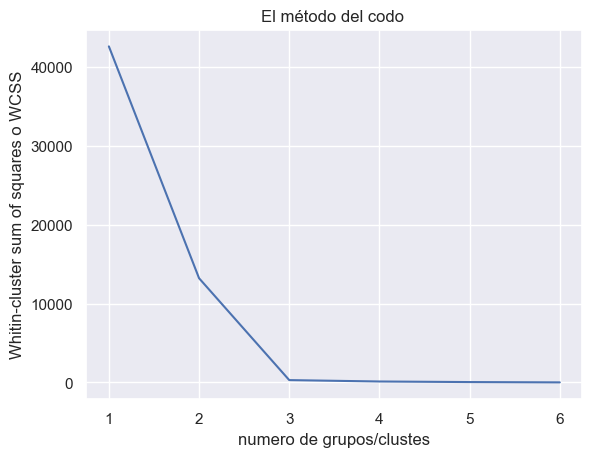

In [66]:
#crear una variable que contenga los numeros del 1 al 6, para que podamos usar x como eje en el grafico 
number_clusters=range(1,7)
#mostar el numero de clusters vs WCSS
plt.plot(number_clusters, wcss)
plt.title('El método del codo ')
plt.xlabel('numero de grupos/clustes')
plt.ylabel('Whitin-cluster sum of squares o WCSS');